### ABSTRACT

#### This study focuses on classifying emails as spam or ham (non-spam) using the Naive Bayes classification algorithm. The dataset consists of emails labeled as either spam or ham, along with their corresponding text content.

#### After preprocessing the text data (e.g., removing punctuation, converting to lowercase), the Naive Bayes model is trained on a portion of the dataset and evaluated using metrics such as accuracy, precision, recall, and F1-score. The model's performance is then assessed by predicting the labels for the remaining portion of the dataset.

#### The results demonstrate the effectiveness of the Naive Bayes algorithm in classifying emails as spam or ham based on their text content. However, further preprocessing and feature engineering techniques could potentially improve the model's performance. Overall, this study highlights the utility of Naive Bayes in email spam classification tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('emails.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
ham_spam = data['label'].value_counts()
print(ham_spam)


ham     3672
spam    1499
Name: label, dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
# covert small words
data['text']=data['text'].str.lower()
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1
4,2030,ham,subject: re : indian springs\r\nthis deal is t...,0


In [8]:
import string
punc_to_rmv=string.punctuation
def remove_punctuation(text):
    translator=str.maketrans("","".punc_to_rmv)
    return text.translate(translator)
data['text']

0       subject: enron methanol ; meter # : 988291\r\n...
1       subject: hpl nom for january 9 , 2001\r\n( see...
2       subject: neon retreat\r\nho ho ho , we ' re ar...
3       subject: photoshop , windows , office . cheap ...
4       subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    subject: put the 10 on the ft\r\nthe transport...
5167    subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    subject: calpine daily gas nomination\r\n>\r\n...
5169    subject: industrial worksheets for august 2000...
5170    subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

# Assuming you have already imported nltk and downloaded WordNet data

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data['text'] = data['text'].apply(lambda text: lemmatize_words(text))
data.head()


,Unnamed: 0,label,text,label_num
0,605,ham,subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"subject: photoshop , window , office . cheap ....",1
4,2030,ham,subject: re : indian spring this deal is to bo...,0


In [11]:
x=data.text
y=data.label

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(x)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df.head()

,00,000,0000,000000,000000000002858,000000000049773,000080,000099,0001,00018,...,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
coun_vect.vocabulary_

{'subject': 41436,
 'enron': 17932,
 'methanol': 29644,
 'meter': 29638,
 '988291': 4629,
 'this': 42768,
 'is': 25168,
 'follow': 19937,
 'up': 44520,
 'to': 43133,
 'the': 42656,
 'note': 31735,
 'gave': 20801,
 'you': 47497,
 'on': 32414,
 'monday': 30294,
 '00': 0,
 'preliminary': 35009,
 'flow': 19832,
 'data': 14686,
 'provided': 35503,
 'by': 10457,
 'daren': 14630,
 'please': 34413,
 'override': 32945,
 'pop': 34664,
 'daily': 14536,
 'volume': 45520,
 'presently': 35068,
 'zero': 47726,
 'reflect': 36848,
 'activity': 5124,
 'can': 10722,
 'obtain': 32058,
 'from': 20344,
 'gas': 20751,
 'control': 13416,
 'change': 11535,
 'needed': 31159,
 'asap': 7120,
 'for': 19996,
 'economics': 17151,
 'purpose': 35729,
 'hpl': 23380,
 'nom': 31616,
 'january': 25454,
 '2001': 1116,
 'see': 39037,
 'attached': 7390,
 'file': 19504,
 'hplnol': 23387,
 '09': 214,
 'xl': 47086,
 'neon': 31222,
 'retreat': 37441,
 'ho': 23062,
 'we': 45959,
 're': 36523,
 'around': 7025,
 'that': 42648,
 'mo

In [14]:
#shape of count vector: number of rows and unique words
count_matrix.shape

(5171, 47992)

In [15]:
coun_vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [16]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2))

x_vect = vect.fit_transform(x)


In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_vect)

In [18]:
tokens = vect.get_feature_names_out()
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])

df_idf.head()

,idf_weights
00,2.903326
00 00,5.862135
00 000,7.759255
00 01,7.248430
00 02,7.605105


In [19]:
#get tfidf vector for first document
first_document_vector=x_tfidf[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
flow data,0.161634
activity obtain,0.161634
follow note,0.161634
override pop,0.161634
reflect daily,0.161634
...,...
doncesar st,0.000000
doneck,0.000000
doneck reactantsurrey,0.000000
donellec,0.000000


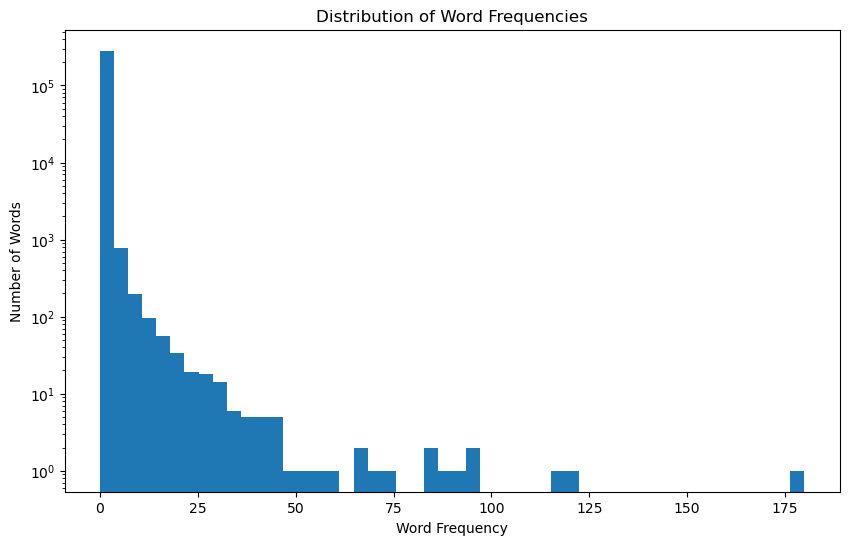

In [20]:
# Sum up the word frequencies
word_frequencies = x_tfidf.sum(axis=0)

# Convert to a list for easier handling
word_frequencies = word_frequencies.tolist()[0]

# Step 2: Visualize the Distribution
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, log=True)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_tfidf, y)

In [22]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled,test_size = 0.20, random_state=42)

In [23]:
print(x_train.shape)
print(y_test.shape)

(5875, 283698)
(1469,)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

mnb = MultinomialNB()
naive_model = mnb.fit(x_train,y_train)
y_pred_class = mnb.predict(x_test)

print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       768
        spam       0.97      1.00      0.98       701

    accuracy                           0.98      1469
   macro avg       0.98      0.98      0.98      1469
weighted avg       0.98      0.98      0.98      1469



In [25]:
import joblib
joblib.dump(naive_model, 'emails.joblib')
joblib.dump(vect, 'CountVectorizer.joblib')
joblib.dump(tfidf_transformer, 'tfidf_transformer.joblib')

['tfidf_transformer.joblib']

In [26]:
model = joblib.load('emails.joblib')
vect = joblib.load('CountVectorizer.joblib')
tfidf = joblib.load('tfidf_transformer.joblib')

text1 ="Congratulations! You have won a free vacation. Claim your prize now!"
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text1])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The email is a spam!!!")
else:
    print("The email is not spam")

['spam']
The email is not spam


In [27]:
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text2])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The email is a spam!!!")
else:
    print("The email is not spam")

['spam']
The email is not spam
